In [255]:
# multivariate one step problem with lstm
from numpy import array
from numpy import hstack
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
import matplotlib.pyplot as plt

In [256]:

from keras.preprocessing.sequence import TimeseriesGenerator
# define dataset
in_seq1 = array([10, 20, 30, 40, 50, 60, 70, 80, 90, 100])
in_seq2 = array([15, 25, 35, 45, 55, 65, 75, 85, 95, 105])
target = array([[1,2],[2,3],[3,4],[4,5],[5,6],[6,7],[7,8],[8,9],[9,10],[10,11]])
# reshape series

in_seq1 = in_seq1.reshape((len(in_seq1), 1))
in_seq2 = in_seq2.reshape((len(in_seq2), 1))

In [273]:
print(dataset)

[[ 10  15]
 [ 20  25]
 [ 30  35]
 [ 40  45]
 [ 50  55]
 [ 60  65]
 [ 70  75]
 [ 80  85]
 [ 90  95]
 [100 105]]


In [257]:
print(in_seq1.shape,  target.shape)

(10, 1) (10, 2)


In [258]:
# horizontally stack columns
dataset = hstack((in_seq1, in_seq2))


n_input = 2
generator = TimeseriesGenerator(dataset, target, length=n_input, batch_size=1)
# print each sample
for i in range(len(generator)):
	x, y = generator[i]
	print('%s => %s' % (x, y))

[[[10 15]
  [20 25]]] => [[3 4]]
[[[20 25]
  [30 35]]] => [[4 5]]
[[[30 35]
  [40 45]]] => [[5 6]]
[[[40 45]
  [50 55]]] => [[6 7]]
[[[50 55]
  [60 65]]] => [[7 8]]
[[[60 65]
  [70 75]]] => [[8 9]]
[[[70 75]
  [80 85]]] => [[ 9 10]]
[[[80 85]
  [90 95]]] => [[10 11]]


In [259]:
print(dataset)

[[ 10  15]
 [ 20  25]
 [ 30  35]
 [ 40  45]
 [ 50  55]
 [ 60  65]
 [ 70  75]
 [ 80  85]
 [ 90  95]
 [100 105]]


In [260]:
print('Samples: %d' % len(generator))

Samples: 8


In [261]:
# print each sample
for i in range(len(generator)):
    x, y = generator[i]
    print('%s => %s' % (x, y))

[[[10 15]
  [20 25]]] => [[3 4]]
[[[20 25]
  [30 35]]] => [[4 5]]
[[[30 35]
  [40 45]]] => [[5 6]]
[[[40 45]
  [50 55]]] => [[6 7]]
[[[50 55]
  [60 65]]] => [[7 8]]
[[[60 65]
  [70 75]]] => [[8 9]]
[[[70 75]
  [80 85]]] => [[ 9 10]]
[[[80 85]
  [90 95]]] => [[10 11]]


In [262]:
n_input = 2

In [263]:
generator = TimeseriesGenerator(dataset, target, length=n_input, batch_size=8)

In [264]:
dataset.shape

(10, 2)

In [265]:
n_features=2
n_output=2

In [266]:

# define model
model = Sequential()
model.add(LSTM(100, activation='relu', input_shape=(n_input, n_features)))
model.add(Dense(2))
model.compile(optimizer='adam', loss='mse')

In [267]:

# fit model
model.fit_generator(generator, steps_per_epoch=1, epochs=500, verbose=0)

In [268]:

# make a one step prediction out of sample
x_input = array([[90, 95], [100, 105]]).reshape((1, n_input, n_features))

In [269]:

yhat = model.predict(x_input, verbose=0)
print(yhat)

[[11.069191 12.134053]]


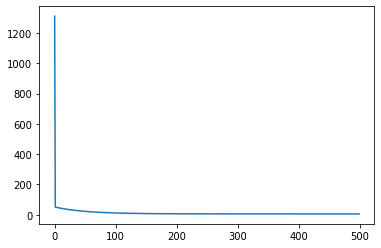

In [271]:
model_lstm2 = Sequential()
model_lstm2.add(LSTM(10, activation='relu', input_shape=(n_input, n_features)))
model_lstm2.add(Dense(n_output))
model_lstm2.compile(optimizer='sgd', loss='mse')
# fit model
history_lstm2=model_lstm2.fit_generator(generator, steps_per_epoch=1, epochs=500, verbose=0)
plt.plot(history_lstm2.history['loss'])